In [3]:
import sys
import torch
from torch import nn
import pprint
import matplotlib.pyplot as plt

sys.path.append("../") # if running from this folder
from src.models import NAVAR_UA
from src.data import load_dataset
from src.training import train_model
from src.utils import tensor_dict_to_str
from src.eval.visualisations import plot_heatmaps
from src.models import TAMCaD_T
from src.models import TAMCaD
from src.models import TAMCaD_UA

In [254]:
dataset = load_dataset('dream3', 'ecoli1')[0]

In [4]:
dataset = load_dataset('synthetic','synthetic_N-5_T-300_K-5')[0]

In [5]:
tensor_dict_to_str(dataset)  # better formatting for printing large tensors

{'name': 'synthetic_N-5_T-300_K-5',
 'data': 'torch.Size([1, 5, 300])',
 'data_noise_adjusted': 'torch.Size([1, 5, 300])',
 'ground_truth': 'torch.Size([5, 5])'}

In [7]:
tensor_data = dataset['data']
tensor_data.shape

torch.Size([1, 5, 300])

In [10]:
ground_truth = dataset['ground_truth']
ground_truth

tensor([[0., 0., 1., 0., 0.],
        [1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0.]])

In [29]:
params = {
    # experiment
    'experiment_name': 'Example_experiment',
    'model_type': TAMCaD_UA,
    'dataset': dataset,
    # training
    'beta':0.01,
    'n_ensembles':10,
    'gamma':0.05,
    'use_gumbel':True,
    'lr': 0.001,
    'epochs': 500,
    'weight_decay': 0.001,
    'test_size': 0.3,
    'batch_size': 16,
    # tcn
    'hidden_dim': 8,
    'kernel_size': 2,
    'n_blocks': 2,
    'n_layers': 2,
    'dropout': 0.2,
    'use_positional_embedding':True,
    # navar
    'lambda1': 0.01,  # regularization
}

In [39]:
result = train_model(**params)

[train] loss=0.88,noise=0.39,AUROC=0.93,soft_=0.65 [test] loss=0.73,noise=0.35,AUROC=0.93,soft_=0.67: 100%|██████████| 500/500 [16:14<00:00,  1.95s/it]   


In [36]:
# Metrics are outputted as (epochs, values) as the test_metrics are only computed every x steps
pprint.pprint(tensor_dict_to_str(result)) # better formatting for printing large tensors

{'model_params': {'beta': 0.01,
                  'dataset_name': 'synthetic_N-5_T-300_K-5',
                  'dropout': 0.2,
                  'epochs': 500,
                  'gamma': 0.05,
                  'hidden_dim': 8,
                  'kernel_size': 2,
                  'lambda1': 0.01,
                  'lr': 0.001,
                  'model': "<class 'type'>",
                  'n_blocks': 2,
                  'n_ensembles': 10,
                  'n_layers': 2,
                  'n_params': 33350,
                  'optimizer': 'AdamW',
                  'receptive_field': 7,
                  'test_size': 0.3,
                  'training_time_per_epoch': 0.009911154647428826,
                  'use_gumbel': True,
                  'use_positional_embedding': True,
                  'weight_decay': 0.001},
 'test_artifacts': {'FPR': 'torch.Size([25])',
                    'TPR': 'torch.Size([25])',
                    'attention_logits': 'torch.Size([5, 5, 84])',
          

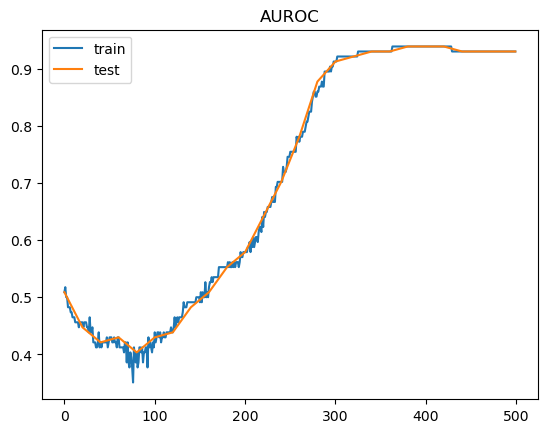

In [37]:
plt.plot(*result['train_metrics']['AUROC'], label='train')
plt.plot(*result['test_metrics']['AUROC'], label='test')
plt.title('AUROC')
plt.legend()
plt.show()

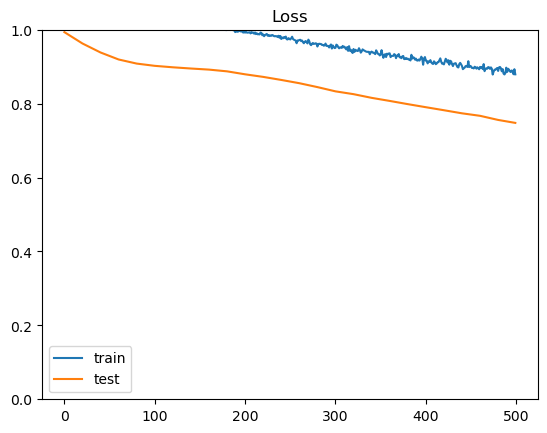

In [31]:
plt.plot(*result['train_metrics']['loss'], label='train')
plt.plot(*result['test_metrics']['loss'], label='test')
plt.ylim(0, 1)
plt.title('Loss')
plt.legend()
plt.show()

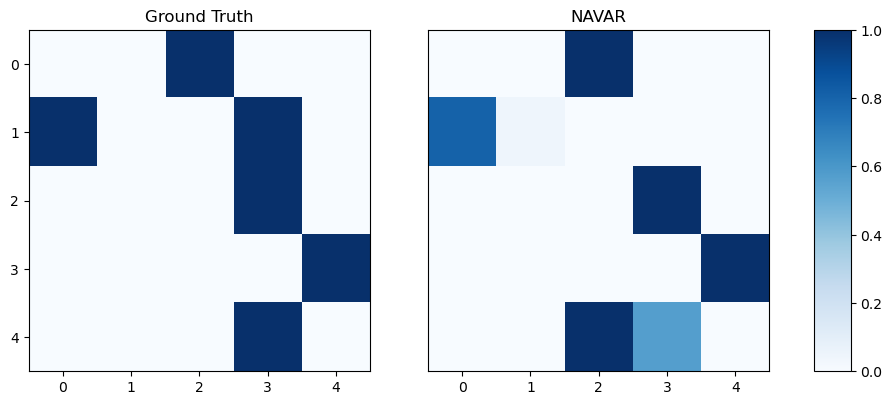

In [38]:
a = result['test_artifacts']['matrix']
A = (a-torch.mean(a))/torch.std(a)
plot_heatmaps(dataset['ground_truth'], A, names=['Ground Truth', 'NAVAR'], use_ticks=True)
fig = plt.gcf()
fig.set_size_inches(10, 4, forward=True)

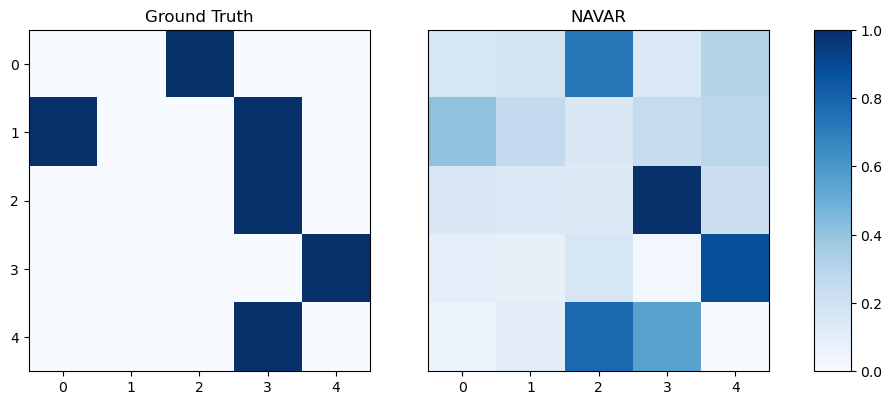

In [33]:
plot_heatmaps(dataset['ground_truth'], result['test_artifacts']['matrix'], names=['Ground Truth', 'NAVAR'], use_ticks=True)
fig = plt.gcf()
fig.set_size_inches(10, 4, forward=True)

In [18]:
# return metrics data (loss AUC etc.)
model(tensor_data)

NameError: name 'model' is not defined

In [ ]:
# create_artifacts will return artifacts alongside metrics (contributions, causal matrix etc.)
model(tensor_data, create_artifacts=True)

In [ ]:
# temporal_matrix will apply a sliding window std to construct a temporal matrix
model(tensor_data, create_artifacts=True, temporal_matrix=True)

In [17]:
# ground_truth will compute AUC etc. and adds it to metrics
model(tensor_data, create_artifacts=True, ground_truth=ground_truth)

NameError: name 'model' is not defined